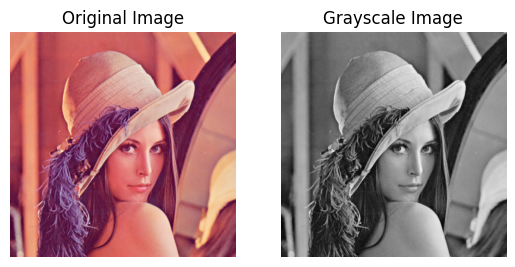

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

url = 'lena.tif'
image = cv.imread(cv.samples.findFileOrKeep(url), cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 1
new_image = (image[:, :, 0] / 3 + image[:, :, 1] / 3 + image[:, :, 2] / 3).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.show()


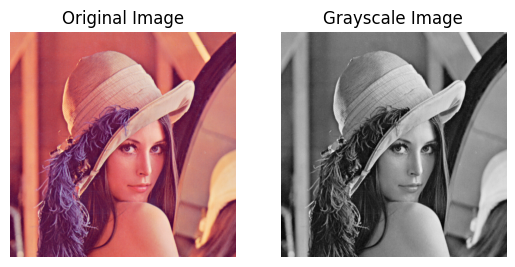

In [2]:
#2
new_image2 = (image[:, :, 0] * 0.299 + image[:, :, 1] * 0.597 + image[:, :, 2] * 0.114).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(new_image2, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.show()

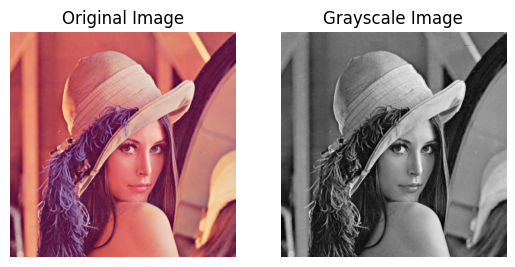

In [3]:
#3
# Gray  = + (min( R, G, B) max( R, G, B)) / 2 .

new_image3 = ((np.minimum.reduce([image[:, :, 0], image[:, :, 1], image[:, :, 2]]) + np.maximum.reduce([image[:, :, 0], image[:, :, 1], image[:, :, 2]]) * 0.114) / 2).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(new_image3, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.show()

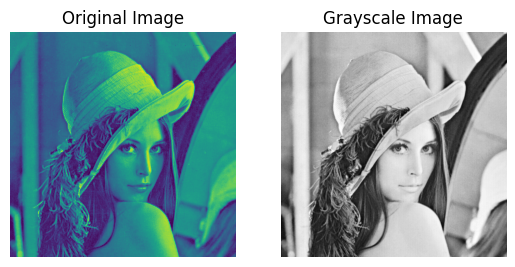

In [4]:
#4.

new_image4 = np.minimum.reduce([image[:, :, 0], image[:, :, 1], image[:, :, 2]]).astype(np.uint8)
new_image5 = np.maximum.reduce([image[:, :, 0], image[:, :, 1], image[:, :, 2]]).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(new_image4)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(new_image5, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.show()

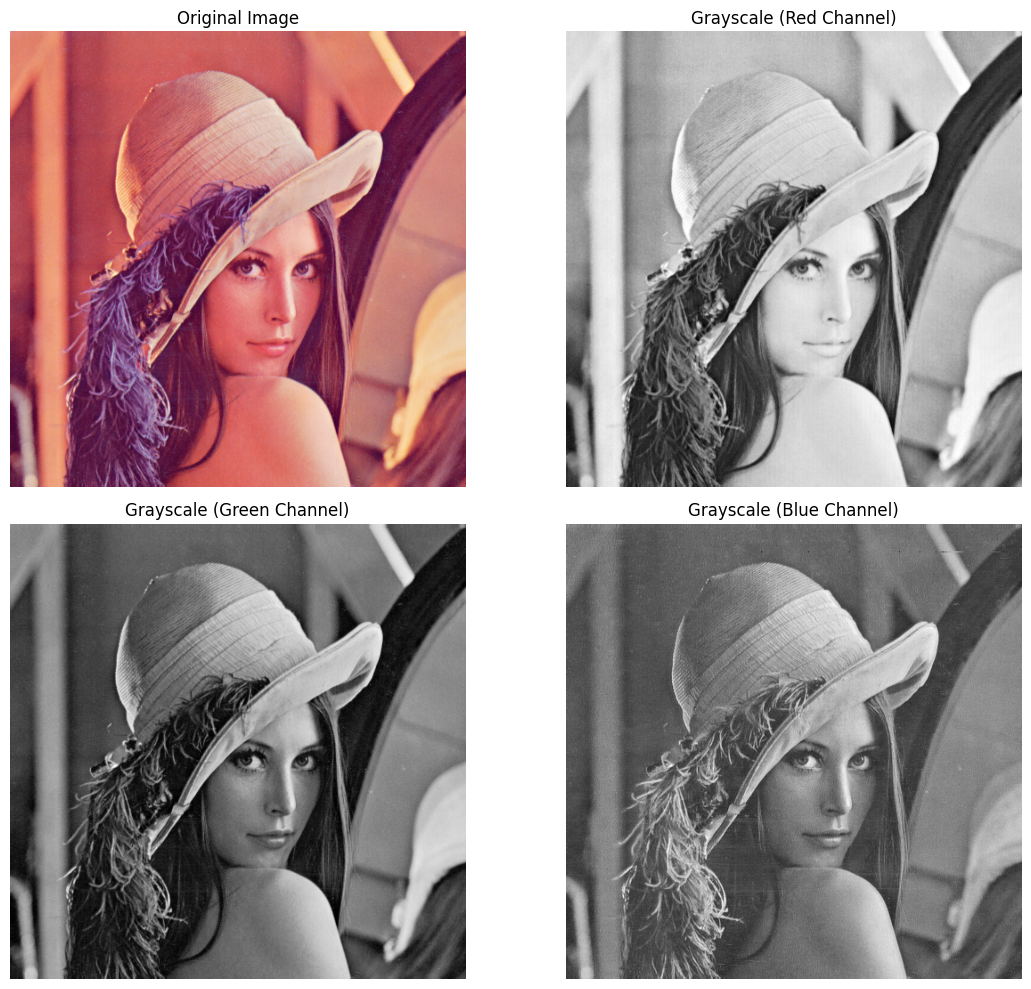

In [5]:
#5 de vazut

def convert_singleChanell(image_vec,channel):

    if image_vec.ndim !=3 or image_vec.shape[2] != 3:
        raise ValueError("Image should be RGB")
    
    if channel == 'R':
        gray_image = image_vec[:,:,0]
    elif channel == 'G':
        gray_image = image_vec[:,:,1]
    elif channel == 'B':
        gray_image = image_vec[:,:,2]
    else:
        raise ValueError("Wrong Channel")
    
    gray_image = Image.fromarray(gray_image)
    return gray_image

image_path = 'lena.tif'
image = Image.open(image_path)
image_vec = np.array(image)

grayscale_r = convert_singleChanell(image_vec, 'R')
grayscale_g = convert_singleChanell(image_vec, 'G')
grayscale_b = convert_singleChanell(image_vec, 'B')

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(grayscale_r, cmap='gray')
plt.axis('off')
plt.title('Grayscale (Red Channel)')

plt.subplot(2, 2, 3)
plt.imshow(grayscale_g, cmap='gray')
plt.axis('off')
plt.title('Grayscale (Green Channel)')

plt.subplot(2, 2, 4)
plt.imshow(grayscale_b, cmap='gray')
plt.axis('off')
plt.title('Grayscale (Blue Channel)')

plt.tight_layout()
plt.show()

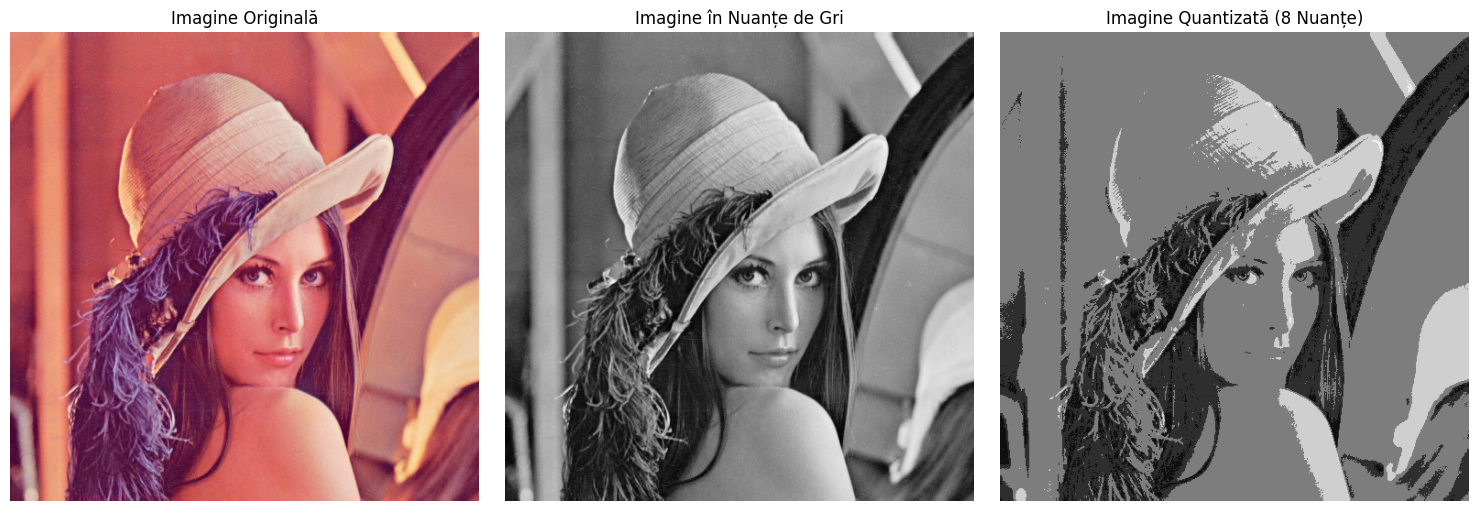

In [6]:
#6 -- de vazut
def convert_to_grayscale(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)

    if image_array.ndim != 3 or image_array.shape[2] != 3:
        raise ValueError("Imaginea trebuie să fie în format RGB")
    gray_image = 0.2989 * image_array[:, :, 0] + 0.5870 * image_array[:, :, 1] + 0.1140 * image_array[:, :, 2]
    
    return image, gray_image

def generateRandBoundaries(p):
    boundaries = np.random.randint(0, 256, size=p - 1)
    boundaries = np.sort(boundaries)
    boundaries = np.concatenate(([0], boundaries, [255]))
    
    return boundaries

def reduce_shades(gray_image, p):
    boundaries = generateRandBoundaries(p)
    quantized_image = np.zeros_like(gray_image)

    for i in range(p):
        lower = boundaries[i]
        upper = boundaries[i + 1]
        intervalVal = (lower + upper) // 2
        quantized_image[(gray_image >= lower) & (gray_image < upper)] = intervalVal
    
    return quantized_image

image_path = 'lena.tif'
p = np.random.randint(2, 16)

original_image, gray_image = convert_to_grayscale(image_path)
quantized_image = reduce_shades(gray_image, p)
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.axis('off')
plt.title('Imagine Originală')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Imagine în Nuanțe de Gri')

plt.subplot(1, 3, 3)
plt.imshow(quantized_image, cmap='gray')
plt.axis('off')
plt.title(f'Imagine Quantizată ({p} Nuanțe)')
    
plt.tight_layout()
plt.show()



/tmp/ipykernel_11021/882805415.py:13: RuntimeWarning: overflow encountered in scalar subtract
  error = old_pixel - new_pixel
/tmp/ipykernel_11021/882805415.py:16: RuntimeWarning: overflow encountered in scalar multiply
  img_array[y, x + 1] = min(255, max(0, img_array[y, x + 1] + error * 7 / 16))
/tmp/ipykernel_11021/882805415.py:20: RuntimeWarning: overflow encountered in scalar multiply
  img_array[y + 1, x] = min(255, max(0, img_array[y + 1, x] + error * 5 / 16))
/tmp/ipykernel_11021/882805415.py:19: RuntimeWarning: overflow encountered in scalar multiply
  img_array[y + 1, x - 1] = min(255, max(0, img_array[y + 1, x - 1] + error * 3 / 16))


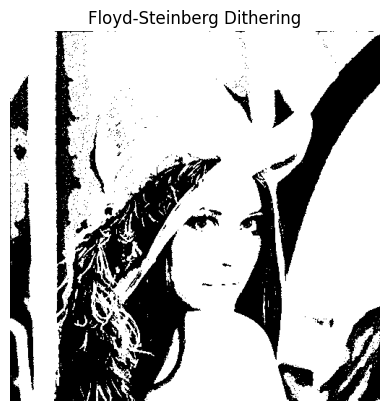

/tmp/ipykernel_11021/882805415.py:37: RuntimeWarning: overflow encountered in scalar subtract
  error = old_pixel - new_pixel
/tmp/ipykernel_11021/882805415.py:40: RuntimeWarning: overflow encountered in scalar multiply
  img_array[y, x + 1] = min(255, max(0, img_array[y, x + 1] + error * 8 / 42))
/tmp/ipykernel_11021/882805415.py:42: RuntimeWarning: overflow encountered in scalar multiply
  img_array[y, x + 2] = min(255, max(0, img_array[y, x + 2] + error * 4 / 42))
/tmp/ipykernel_11021/882805415.py:46: RuntimeWarning: overflow encountered in scalar multiply
  img_array[y + 1, x] = min(255, max(0, img_array[y + 1, x] + error * 4 / 42))
/tmp/ipykernel_11021/882805415.py:48: RuntimeWarning: overflow encountered in scalar multiply
  img_array[y + 1, x + 1] = min(255, max(0, img_array[y + 1, x + 1] + error * 8 / 42))
/tmp/ipykernel_11021/882805415.py:50: RuntimeWarning: overflow encountered in scalar multiply
  img_array[y + 1, x + 2] = min(255, max(0, img_array[y + 1, x + 2] + error * 4 

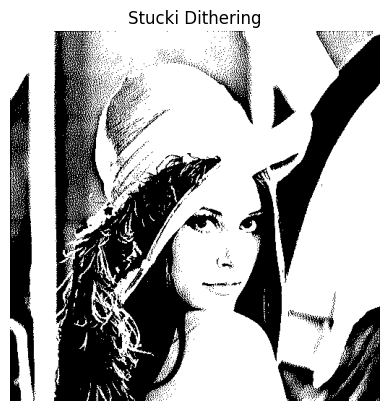

In [7]:
#7 -- trb sa il vf manual

def floyd_steinberg_dithering(image):

    img_array = np.array(image.convert('L'))
    height, width = img_array.shape

    for y in range(height):
        for x in range(width):
            old_pixel = img_array[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            img_array[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < width:
                img_array[y, x + 1] = min(255, max(0, img_array[y, x + 1] + error * 7 / 16))
            if y + 1 < height:
                if x - 1 >= 0:
                    img_array[y + 1, x - 1] = min(255, max(0, img_array[y + 1, x - 1] + error * 3 / 16))
                img_array[y + 1, x] = min(255, max(0, img_array[y + 1, x] + error * 5 / 16))
                if x + 1 < width:
                    img_array[y + 1, x + 1] = min(255, max(0, img_array[y + 1, x + 1] + error * 1 / 16))
    
    return img_array

def stucki_dithering(image):

    img_array = np.array(image.convert('L'))
    
    height, width = img_array.shape

    for y in range(height):
        for x in range(width):
            old_pixel = img_array[y, x]
            new_pixel = 255 if old_pixel > 127 else 0 
            img_array[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < width:
                img_array[y, x + 1] = min(255, max(0, img_array[y, x + 1] + error * 8 / 42))
            if x + 2 < width:
                img_array[y, x + 2] = min(255, max(0, img_array[y, x + 2] + error * 4 / 42))
            if y + 1 < height:
                if x - 1 >= 0:
                    img_array[y + 1, x - 1] = min(255, max(0, img_array[y + 1, x - 1] + error * 2 / 42))
                img_array[y + 1, x] = min(255, max(0, img_array[y + 1, x] + error * 4 / 42))
                if x + 1 < width:
                    img_array[y + 1, x + 1] = min(255, max(0, img_array[y + 1, x + 1] + error * 8 / 42))
                if x + 2 < width:
                    img_array[y + 1, x + 2] = min(255, max(0, img_array[y + 1, x + 2] + error * 4 / 42))
            if y + 2 < height:
                img_array[y + 2, x] = min(255, max(0, img_array[y + 2, x] + error * 1 / 42))
    
    return img_array

def show_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

image_path = 'lena.tif'
image = Image.open(image_path)

floyd_result = floyd_steinberg_dithering(image)
show_image(floyd_result, 'Floyd-Steinberg Dithering')

stucki_result = stucki_dithering(image)
show_image(stucki_result, 'Stucki Dithering')



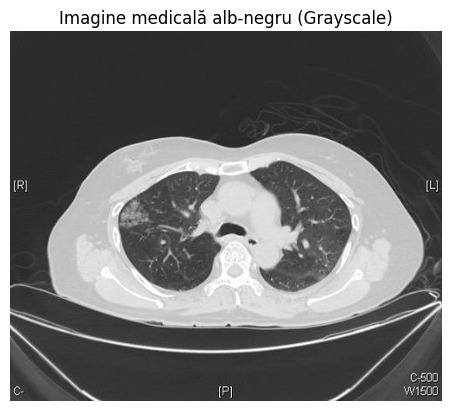

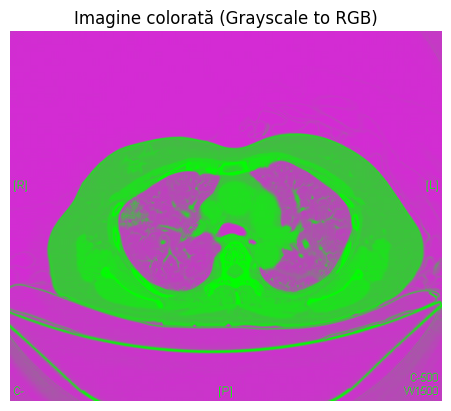

In [8]:
# La ultima intrebare  --  fac ca la firma interpolare cu un checker alb negru (o sa am 2 - unul rgb si unul alb- negru ) ---> asa fac conversia

def get_image(image_path):
    image = Image.open(image_path).convert('L')
    return np.array(image)

def grayscale_to_rgb(gray_img):
    colored_image = np.zeros((gray_img.shape[0], gray_img.shape[1], 3), dtype=np.uint8)
    colored_image[:, :, 0] = np.clip(255 - gray_img, 0, 255)
    colored_image[:, :, 1] = np.clip(gray_img, 0, 255)
    colored_image[:, :, 2] = np.clip(255 - gray_img, 0, 255)
    return colored_image

def show_image(image, title, grayscale=False):
    if grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

image_path = 'test.jpg'
gray_image = get_image(image_path)
rgb_image = grayscale_to_rgb(gray_image)

show_image(gray_image, 'Imagine medicală alb-negru (Grayscale)', grayscale=True)
show_image(rgb_image, 'Imagine colorată (Grayscale to RGB)')

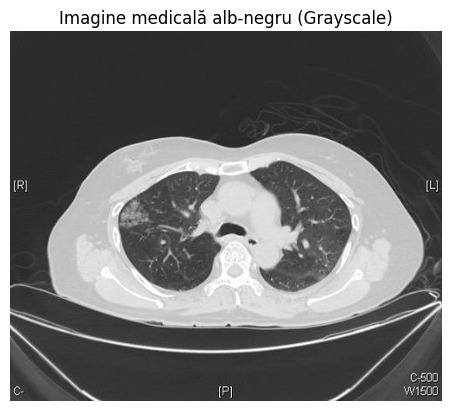

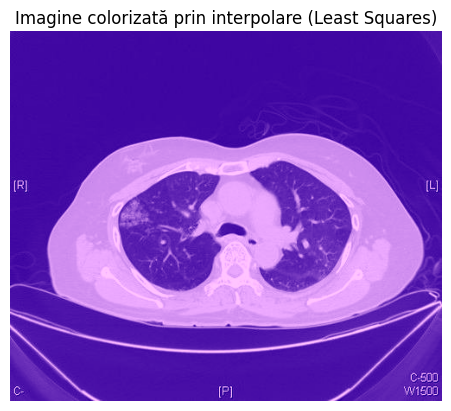

In [9]:
# La ultima intrebare  --  fac ca la firma interpolare cu un checker alb negru (o sa am 2 - unul rgb si unul alb- negru ) ---> asa fac conversia


def get_image(image_path):
    image = Image.open(image_path).convert('L')
    return np.array(image)

def interpolate_colors(gray_img, control_points, colors):
    A = np.vstack([control_points, np.ones(len(control_points))]).T
    A_pseudo_inverse = np.linalg.pinv(A)

    coeffs_r = A_pseudo_inverse @ colors[:, 0]
    coeffs_g = A_pseudo_inverse @ colors[:, 1]
    coeffs_b = A_pseudo_inverse @ colors[:, 2]

    h, w = gray_img.shape
    colored_image = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            intensity = gray_img[i, j]
            colored_image[i, j, 0] = np.clip(coeffs_r[0] * intensity + coeffs_r[1], 0, 255)
            colored_image[i, j, 1] = np.clip(coeffs_g[0] * intensity + coeffs_g[1], 0, 255)
            colored_image[i, j, 2] = np.clip(coeffs_b[0] * intensity + coeffs_b[1], 0, 255)

    return colored_image

def show_image(image, title, grayscale=False):
    if grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

control_points = np.array([50, 100, 150, 200, 255])
colors = np.array([[60, 20, 150],
                   [120, 50, 200],
                   [180, 100, 230],
                   [220, 150, 255],
                   [255, 200, 255]])

image_path = 'test.jpg'
gray_image = get_image(image_path)
rgb_image = interpolate_colors(gray_image, control_points, colors)

show_image(gray_image, 'Imagine medicală alb-negru (Grayscale)', grayscale=True)
show_image(rgb_image, 'Imagine colorizată prin interpolare (Least Squares)')


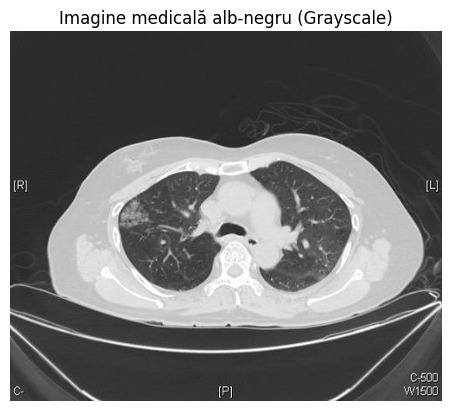

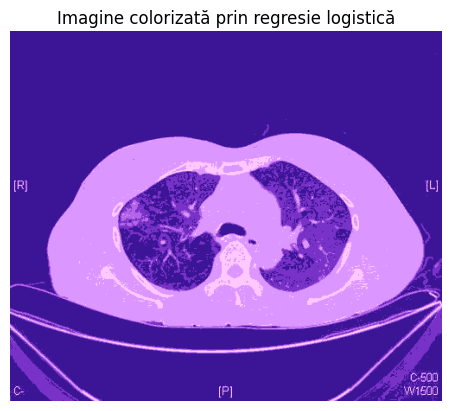

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from PIL import Image
import matplotlib.pyplot as plt

def get_image(image_path):
    image = Image.open(image_path).convert('L')
    return np.array(image)

def logistic_regression_colorization(gray_img, control_points, colors):
    h, w = gray_img.shape
    gray_pixels = gray_img.flatten()

    models = []
    for channel in range(3):
        model = LogisticRegression(max_iter=10000)
        model.fit(control_points.reshape(-1, 1), colors[:, channel])
        models.append(model)

    colored_image = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            intensity = gray_img[i, j]
            for channel in range(3):
                colored_image[i, j, channel] = np.clip(models[channel].predict([[intensity]])[0], 0, 255)

    return colored_image

def show_image(image, title, grayscale=False):
    if grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

control_points = np.array([50, 100, 150, 200, 255])
colors = np.array([[60, 20, 150],
                   [120, 50, 200],
                   [180, 100, 230],
                   [220, 150, 255],
                   [255, 200, 255]])

image_path = 'test.jpg'
gray_image = get_image(image_path)

rgb_image = logistic_regression_colorization(gray_image, control_points, colors)

show_image(gray_image, 'Imagine medicală alb-negru (Grayscale)', grayscale=True)
show_image(rgb_image, 'Imagine colorizată prin regresie logistică')


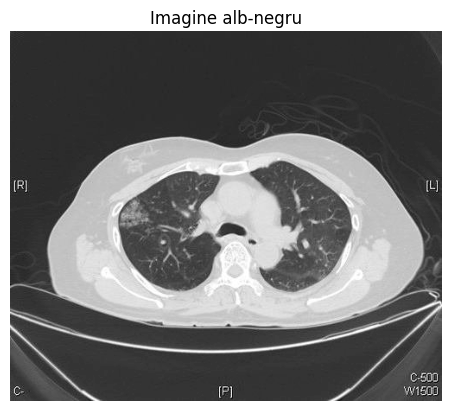

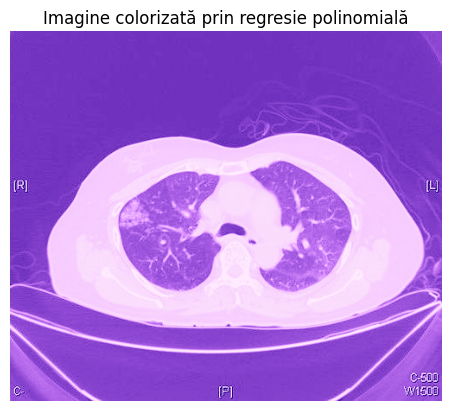

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def get_image(image_path):
    image = Image.open(image_path).convert('L')
    return np.array(image)

def normalize_data(data):
    return data / 255.0

def polynomial_regression(X, y, degree=2):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_poly, y)
    return model, poly

def polynomial_regression_predict(gray_img, models, polys):
    h, w = gray_img.shape
    colored_image = np.zeros((h, w, 3), dtype=np.uint8)

    for i in range(h):
        for j in range(w):
            intensity = gray_img[i, j]
            for channel in range(3):
                X = np.array([[intensity]])
                X_poly = polys[channel].transform(X)
                prediction = models[channel].predict(X_poly)
                colored_image[i, j, channel] = np.clip(prediction[0], 0, 255)
    
    return colored_image

# Funcție pentru a arăta imaginea
def show_image(image, title, grayscale=False):
    if grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

control_points = np.array([20, 50, 80, 100, 120, 150, 180, 200, 220, 250, 255])
colors = np.array([[60, 20, 150],  # R
                   [120, 50, 200],  # G
                   [180, 100, 230],  # B
                   [200, 130, 250],
                   [220, 150, 255],
                   [230, 170, 255],
                   [240, 190, 255],
                   [250, 210, 255],
                   [255, 220, 255],
                   [255, 230, 255],
                   [255, 240, 255]])
image_path = 'test.jpg'
gray_image = get_image(image_path)

gray_image_normalized = normalize_data(gray_image)


models = []
polys = []
for channel in range(3):
    X = control_points.reshape(-1, 1)
    y = colors[:, channel] 
    model, poly = polynomial_regression(X, y, degree=3)
    models.append(model)
    polys.append(poly)

rgb_image = polynomial_regression_predict(gray_image, models, polys)

show_image(gray_image, 'Imagine alb-negru', grayscale=True)
show_image(rgb_image, 'Imagine colorizată prin regresie polinomială')
